In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command

from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time


In [4]:
# Loading MNIST dataset
mn = mnist.load_data()

print("MNIST dataset/n")
mn

MNIST dataset/n


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [0]:
# Splitting MNIST dataset into train and test

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
print("Shape of X_train is", X_train.shape)
print("Shape of y_train is", y_train.shape, '\n')

print("Shape of X_test is", X_test.shape)
print("Shape of y_test is", y_test.shape, '\n')

print("Number of training examples :", X_train.shape[0])
print("Number of testing examples :", X_test.shape[0], '\n')

print("Each training image is of shape", (X_train.shape[1], X_train.shape[2]))
print("Each testing image is of shape", (X_test.shape[1], X_test.shape[2]))

Shape of X_train is (60000, 28, 28)
Shape of y_train is (60000,) 

Shape of X_test is (10000, 28, 28)
Shape of y_test is (10000,) 

Number of training examples : 60000
Number of testing examples : 10000 

Each training image is of shape (28, 28)
Each testing image is of shape (28, 28)


In [0]:
# Vector is 3 dimensional. So converting 3 dimensional vector to 1 dimensional vector i.e 1 * 784

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [12]:
# Shape and dimensions after converting from 3 dimension to 1 dimension

print("Shape of X_train is", X_train.shape)
print("Shape of X_test is", X_test.shape, '\n')

print("Number of training examples :", X_train.shape[0])
print("Number of testing examples :", X_test.shape[0], '\n')

print("Each training image is of shape", X_train.shape[1])
print("Each testing image is of shape", X_test.shape[1])

Shape of X_train is (60000, 784)
Shape of X_test is (10000, 784) 

Number of training examples : 60000
Number of testing examples : 10000 

Each training image is of shape 784
Each testing image is of shape 784


In [0]:
# If we observe the above matrix each cell is having a value between 0-255
# Before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [14]:
# Here we are having a class number for each image
print("Class label of first image :", y_train[0])

# Lets convert this into a 10 dimensional vector
# Ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# This conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# Model parameters

# Output
output_dim = 10

# Input
input_dim = X_train.shape[1]

batch_size = 128 

# Number of times to input complete data
nb_epoch = 20

# Defining hidden layers
in_lay = 784
hid_lay_1 = 512
hid_lay_2 = 300
hid_lay_3 = 200
hid_lay_4 = 100
hid_lay_5 = 50

In [0]:
# Importing libraries

from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization

In [0]:
# Defining a function to get train and test loss

def mod(layer):
  
  # Initializing Sequential()
  model = Sequential()
  
  if layer == 2:
    
    print("For hidden layers 2", '\n')
    
    # Passing in parameters like input data, output data and activation
    model.add(Dense(hid_lay_1, activation='relu', input_shape = (input_dim,)))
    model.add(Dense(hid_lay_2, activation='relu'))
    model.add(Dense(output_dim, activation='relu'))
    
  if layer == 3:
    
    print("For hidden layers 3", '\n')
    
    # Passing in parameters like input data, output data and activation
    model.add(Dense(hid_lay_1, activation='relu', input_shape = (input_dim,)))
    model.add(Dense(hid_lay_2, activation='relu'))
    model.add(Dense(hid_lay_3, activation='relu'))
    model.add(Dense(output_dim, activation='relu'))
    
  if layer == 5:
    
    print("For hidden layers 5", '\n')
    
    # Passing in parameters like input data, output data and activation
    model.add(Dense(hid_lay_1, activation='relu', input_shape=(input_dim,)))
    model.add(Dense(hid_lay_2, activation='relu'))
    model.add(Dense(hid_lay_3, activation='relu'))
    model.add(Dense(hid_lay_4, activation='relu'))
    model.add(Dense(hid_lay_5, activation='relu'))
    model.add(Dense(output_dim, activation='relu'))
   
  
  # Compiling
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  
  # FIt the model
  history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

  return history

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error

def plt_la(x, vy, ty, ax, t, colors=['b']):
  
  if t == 'loss':
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.title("Epoch vs Loss")
    plt.legend()
    plt.grid()
  
  if t == 'acc':
    ax.plot(x, vy, 'b', label="Validation Accuracy")
    ax.plot(x, ty, 'r', label="Train Accuracy")
    plt.title("Epoch vs Accuracy")
    plt.legend()
    plt.grid()

In [0]:
def plotting(history, t):

  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy')

  # list of epoch numbers
  x = list(range(1,nb_epoch+1))

  # print(history.history.keys())
  # dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
  # history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

  # we will get val_loss and val_acc only when you pass the paramter validation_data
  # val_loss : validation loss
  # val_acc : validation accuracy

  # loss : training loss
  # acc : train accuracy
  # for each key in histrory.histrory we will have a list of length equal to number of epochs
  
  if t == 'loss':
    vy = history.history['val_loss']
    ty = history.history['loss']
  
    plt_la(x, vy, ty, ax, t)
    
  if t == 'acc':
    vy = history.history['val_acc']
    ty = history.history['acc']
  
    plt_la(x, vy, ty, ax, t)
  
  return vy, ty

In [20]:
plot_2 = mod(2)

W0717 10:36:34.833462 139739433367424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 10:36:34.860073 139739433367424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 10:36:34.865509 139739433367424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 10:36:34.914246 139739433367424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 10:36:34.941758 139739433367424 deprecation_wrappe

For hidden layers 2 



W0717 10:36:35.066195 139739433367424 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0717 10:36:35.131325 139739433367424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/step - loss: 1.0303 - acc: 0.7467 - val_loss: 0.6980 - val_acc: 0.8917
Epoch 2/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.6834 - acc: 0.8517 - val_loss: 1.3012 - val_acc: 0.4896
Epoch 3/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.6654 - acc: 0.8600 - val_loss: 0.6658 - val_acc: 0.7872
Epoch 4/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.5612 - acc: 0.8716 - val_loss: 1.1368 - val_acc: 0.4313
Epoch 5/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.9658 - acc: 0.6388 - val_loss: 1.5858 - val_acc: 0.1322
Epoch 6/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.9826 - acc: 0.6496 - val_loss: 0.7014 - val_acc: 0.9017
Epoch 7/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.5582 - acc: 0.8998 - val_loss: 0.4414 - val_acc

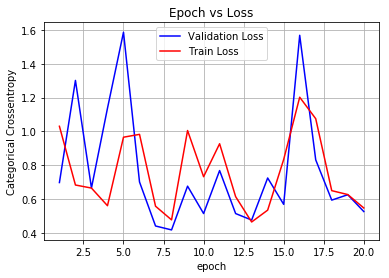

In [21]:
v_el_2, t_el_2 = plotting(plot_2, 'loss')

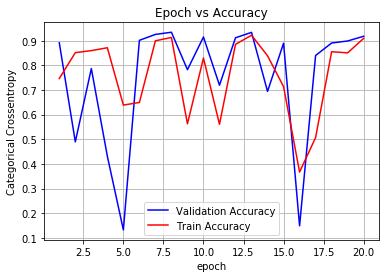

In [22]:
v_ea_2, t_ea_2 = plotting(plot_2, 'acc')

In [23]:
va_el_2 = np.round(min(v_el_2), 3)
ta_el_2 = np.round(min(t_el_2),3)

print("Validation loss:", va_el_2)
print("Train loss:", ta_el_2, '\n')

print('*'*30, '\n')

va_ea_2 = np.round(max(v_ea_2),3)
ta_ea_2 = np.round(max(t_ea_2),3)

print("Validation accuracy:", va_ea_2)
print("Train accuracy:", ta_ea_2)

Validation loss: 0.418
Train loss: 0.465 

****************************** 

Validation accuracy: 0.934
Train accuracy: 0.922


In [24]:
plot_3 = mod(3)

For hidden layers 3 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/step - loss: 1.2680 - acc: 0.8193 - val_loss: 0.4619 - val_acc: 0.9143
Epoch 2/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.6163 - acc: 0.8604 - val_loss: 0.4458 - val_acc: 0.8960
Epoch 3/20
60000/60000 [==============================] - 4s 58us/step - loss: 0.6054 - acc: 0.8495 - val_loss: 0.3670 - val_acc: 0.9394
Epoch 4/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.3627 - acc: 0.9327 - val_loss: 0.2869 - val_acc: 0.9415
Epoch 5/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.3297 - acc: 0.9254 - val_loss: 0.3404 - val_acc: 0.9362
Epoch 6/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.3910 - acc: 0.9160 - val_loss: 0.3530 - val_acc: 0.9317
Epoch 7/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.2994 - acc: 0.9466 - val_

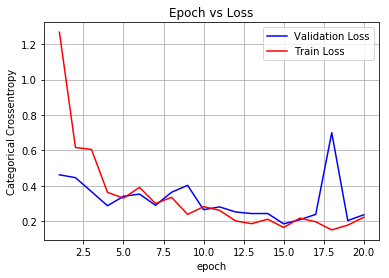

In [25]:
v_el_3, t_el_3 = plotting(plot_3, 'loss')

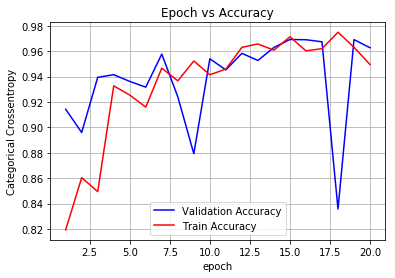

In [26]:
v_ea_3, t_ea_3 = plotting(plot_3, 'acc')


In [27]:
va_el_3 = np.round(min(v_el_3), 3)
ta_el_3 = np.round(min(t_el_3),3)

print("Validation loss:", va_el_3)
print("Train loss:", ta_el_3, '\n')

print('*'*30, '\n')

va_ea_3 = np.round(max(v_ea_3),3)
ta_ea_3 = np.round(max(t_ea_3),3)

print("Validation accuracy:", va_ea_3)
print("Train accuracy:", ta_ea_3)

Validation loss: 0.185
Train loss: 0.15 

****************************** 

Validation accuracy: 0.969
Train accuracy: 0.975


In [28]:
plot_5 = mod(5)

For hidden layers 5 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 78us/step - loss: 2.6661 - acc: 0.6774 - val_loss: 2.1556 - val_acc: 0.8120
Epoch 2/20
60000/60000 [==============================] - 4s 70us/step - loss: 2.5416 - acc: 0.7451 - val_loss: 4.0220 - val_acc: 0.6059
Epoch 3/20
60000/60000 [==============================] - 4s 66us/step - loss: 4.0411 - acc: 0.6686 - val_loss: 3.9389 - val_acc: 0.7095
Epoch 4/20
60000/60000 [==============================] - 4s 70us/step - loss: 4.0192 - acc: 0.6699 - val_loss: 4.0392 - val_acc: 0.6216
Epoch 5/20
60000/60000 [==============================] - 4s 69us/step - loss: 3.8282 - acc: 0.7113 - val_loss: 3.7016 - val_acc: 0.7401
Epoch 6/20
60000/60000 [==============================] - 4s 67us/step - loss: 3.7880 - acc: 0.7074 - val_loss: 3.7204 - val_acc: 0.7397
Epoch 7/20
60000/60000 [==============================] - 4s 70us/step - loss: 3.6731 - acc: 0.7492 - val_

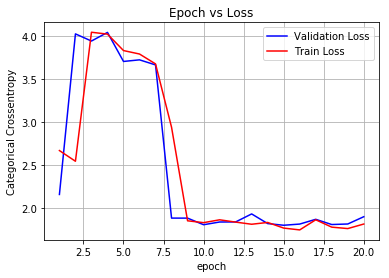

In [29]:
v_el_5, t_el_5 = plotting(plot_5, 'loss')

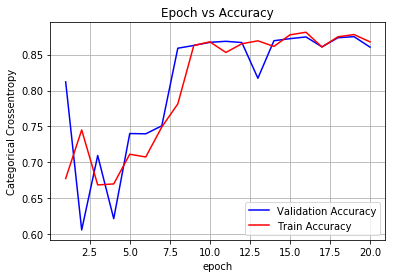

In [30]:
v_ea_5, t_ea_5 = plotting(plot_5, 'acc')


In [31]:
va_el_5 = np.round(min(v_el_5), 3)
ta_el_5 = np.round(min(t_el_5),3)

print("Validation loss:", va_el_5)
print("Train loss:", ta_el_5, '\n')

print('*'*30, '\n')

va_ea_5 = np.round(max(v_ea_5),3)
ta_ea_5 = np.round(max(t_ea_5),3)

print("Validation accuracy:", va_ea_5)
print("Train accuracy:", ta_ea_5)

Validation loss: 1.798
Train loss: 1.744 

****************************** 

Validation accuracy: 0.875
Train accuracy: 0.881


In [0]:
# Defining a function to get train and test loss

def mod_drop(layer_drop, drop_rate):
  
  # Initializing Sequential()
  model = Sequential()
 
  if layer_drop == 2:
    
    print("For hidden layers 2", '\n')
    
    # Passing in parameters like input data, output data and activation
    model.add(Dense(hid_lay_1, activation='relu', input_shape=(input_dim,)))
    model.add(Dropout(drop_rate))
    model.add(Dense(hid_lay_2, activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(output_dim, activation='relu'))
    
  if layer_drop == 3:
    
    print("For hidden layers 3", '\n')
    
    # Passing in parameters like input data, output data and activation
    model.add(Dense(hid_lay_1, activation='relu', input_shape=(input_dim,)))
    model.add(Dropout(drop_rate))
    model.add(Dense(hid_lay_2, activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(hid_lay_3, activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(output_dim, activation='relu'))
    
  if layer_drop == 5:
    
    print("For hidden layers 5", '\n')
    
    # Passing in parameters like input data, output data and activation
    model.add(Dense(hid_lay_1, activation='relu', input_shape=(input_dim,)))
    model.add(Dropout(drop_rate))
    model.add(Dense(hid_lay_2, activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(hid_lay_3, activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(hid_lay_4, activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(hid_lay_5, activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(output_dim, activation='relu'))
   
  
  # Compiling
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  
  # FIt the model
  history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

  return history

In [33]:
d_plot_2 = mod_drop(2, 0.25)

W0717 10:40:54.943426 139739433367424 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


For hidden layers 2 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 63us/step - loss: 1.0854 - acc: 0.7995 - val_loss: 0.5659 - val_acc: 0.9150
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.6754 - acc: 0.8788 - val_loss: 0.4785 - val_acc: 0.9076
Epoch 3/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.6606 - acc: 0.8634 - val_loss: 0.6546 - val_acc: 0.7746
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.7083 - acc: 0.8639 - val_loss: 0.4685 - val_acc: 0.9181
Epoch 5/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.5885 - acc: 0.8885 - val_loss: 0.5192 - val_acc: 0.9037
Epoch 6/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.4805 - acc: 0.9126 - val_loss: 0.3552 - val_acc: 0.9380
Epoch 7/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.4518 - acc: 0.9126 - val_

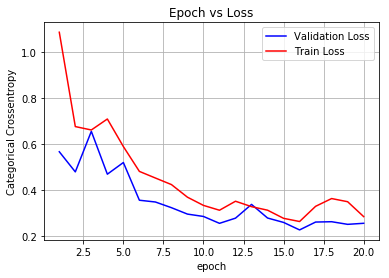

In [34]:
d_v_el_2, d_t_el_2 = plotting(d_plot_2, 'loss')

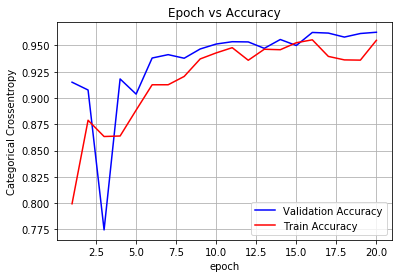

In [35]:
d_v_ea_2, d_t_ea_2 = plotting(d_plot_2, 'acc')

In [36]:
d_va_el_2 = np.round(min(d_v_el_2), 3)
d_ta_el_2 = np.round(min(d_t_el_2),3)

print("Validation loss:", d_va_el_2)
print("Train loss:", d_ta_el_2, '\n')

print('*'*30, '\n')

d_va_ea_2 = np.round(max(d_v_ea_2),3)
d_ta_ea_2 = np.round(max(d_t_ea_2),3)

print("Validation accuracy:", d_va_ea_2)
print("Train accuracy:", d_ta_ea_2)

Validation loss: 0.226
Train loss: 0.263 

****************************** 

Validation accuracy: 0.962
Train accuracy: 0.955


In [37]:
d_plot_3 = mod_drop(3, 0.25)

For hidden layers 3 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 75us/step - loss: 1.2423 - acc: 0.7449 - val_loss: 0.7797 - val_acc: 0.8940
Epoch 2/20
60000/60000 [==============================] - 4s 61us/step - loss: 1.0313 - acc: 0.7695 - val_loss: 0.5514 - val_acc: 0.9033
Epoch 3/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.7357 - acc: 0.8580 - val_loss: 0.4527 - val_acc: 0.9228
Epoch 4/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.6666 - acc: 0.8677 - val_loss: 0.4361 - val_acc: 0.9209
Epoch 5/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.5365 - acc: 0.9015 - val_loss: 0.3631 - val_acc: 0.9309
Epoch 6/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.6555 - acc: 0.8638 - val_loss: 0.4097 - val_acc: 0.9098
Epoch 7/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.5522 - acc: 0.8839 - val_

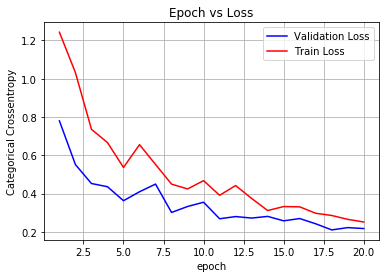

In [38]:
d_v_el_3, d_t_el_3 = plotting(d_plot_3, 'loss')

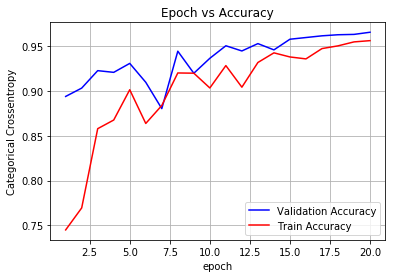

In [42]:
d_v_ea_3, d_t_ea_3 = plotting(d_plot_3, 'acc')

In [43]:
d_va_el_3 = np.round(min(d_v_el_3), 3)
d_ta_el_3 = np.round(min(d_t_el_3),3)

print("Validation loss:", d_va_el_3)
print("Train loss:", d_ta_el_3, '\n')

print('*'*30, '\n')

d_va_ea_3 = np.round(max(d_v_ea_3),3)
d_ta_ea_3 = np.round(max(d_t_ea_3),3)

print("Validation accuracy:", d_va_ea_3)
print("Train accuracy:", d_ta_ea_3)

Validation loss: 0.211
Train loss: 0.252 

****************************** 

Validation accuracy: 0.966
Train accuracy: 0.956


In [44]:
d_plot_5 = mod_drop(5, 0.25)

For hidden layers 5 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 87us/step - loss: 2.2429 - acc: 0.4461 - val_loss: 1.1078 - val_acc: 0.7453
Epoch 2/20
60000/60000 [==============================] - 4s 72us/step - loss: 1.1910 - acc: 0.7068 - val_loss: 0.6980 - val_acc: 0.8591
Epoch 3/20
60000/60000 [==============================] - 5s 75us/step - loss: 1.2555 - acc: 0.7153 - val_loss: 0.7612 - val_acc: 0.8528
Epoch 4/20
60000/60000 [==============================] - 4s 73us/step - loss: 1.0899 - acc: 0.7553 - val_loss: 0.6881 - val_acc: 0.8721
Epoch 5/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.8731 - acc: 0.8244 - val_loss: 0.6142 - val_acc: 0.9024
Epoch 6/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.9427 - acc: 0.8089 - val_loss: 0.6139 - val_acc: 0.8991
Epoch 7/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.8167 - acc: 0.8288 - val_

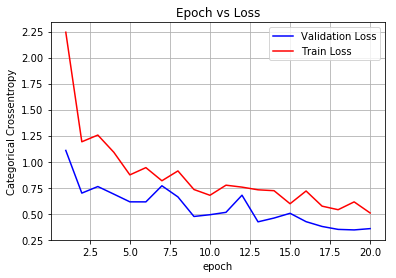

In [45]:
d_v_el_5, d_t_el_5 = plotting(d_plot_5, 'loss')

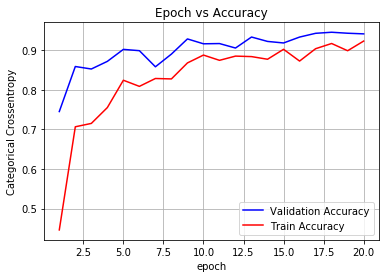

In [46]:
d_v_ea_5, d_t_ea_5 = plotting(d_plot_5, 'acc')

In [47]:
d_va_el_5 = np.round(min(d_v_el_5), 3)
d_ta_el_5 = np.round(min(d_t_el_5),3)

print("Validation loss:", d_va_el_5)
print("Train loss:", d_ta_el_5, '\n')

print('*'*30, '\n')

d_va_ea_5 = np.round(max(d_v_ea_5),3)
d_ta_ea_5 = np.round(max(d_t_ea_5),3)

print("Validation accuracy:", d_va_ea_5)
print("Train accuracy:", d_ta_ea_5)

Validation loss: 0.345
Train loss: 0.507 

****************************** 

Validation accuracy: 0.946
Train accuracy: 0.923


In [0]:
# Defining a function to get train and test loss

def mod_batch(layer_batch):
  
  # Initializing Sequential()
  model_batch = Sequential()
    
  if layer_batch == 2:
    
    print("For hidden layers 2", '\n')
    
    # Passing in parameters like input data, output data and activation
    model_batch.add(Dense(hid_lay_1, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
    model_batch.add(BatchNormalization())
    model_batch.add(Dense(hid_lay_2, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
    model_batch.add(BatchNormalization())
    model_batch.add(Dense(output_dim, activation='relu'))
    
  if layer_batch == 3:
    
    print("For hidden layers 3", '\n')
    
    # Passing in parameters like input data, output data and activation
    model_batch.add(Dense(hid_lay_1, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
    model_batch.add(BatchNormalization())
    model_batch.add(Dense(hid_lay_2, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
    model_batch.add(BatchNormalization())
    model_batch.add(Dense(hid_lay_3, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
    model_batch.add(BatchNormalization())
    model_batch.add(Dense(output_dim, activation='relu'))
    
  if layer_batch == 5:
    
    print("For hidden layers 5", '\n')
    
    # Passing in parameters like input data, output data and activation
    model_batch.add(Dense(hid_lay_1, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
    model_batch.add(BatchNormalization())
    model_batch.add(Dense(hid_lay_2, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
    model_batch.add(BatchNormalization())
    model_batch.add(Dense(hid_lay_3, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
    model_batch.add(BatchNormalization())
    model_batch.add(Dense(hid_lay_4, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
    model_batch.add(BatchNormalization())
    model_batch.add(Dense(hid_lay_5, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
    model_batch.add(BatchNormalization())
    model_batch.add(Dense(output_dim, activation='relu'))
   
  
  # Compiling
  model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  
  # FIt the model
  history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

  return history

In [49]:
b_plot_2 = mod_batch(2)

For hidden layers 2 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.9991 - acc: 0.8124 - val_loss: 0.5446 - val_acc: 0.8979
Epoch 2/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.5026 - acc: 0.8902 - val_loss: 1.5758 - val_acc: 0.8158
Epoch 3/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.5790 - acc: 0.8375 - val_loss: 0.4939 - val_acc: 0.8909
Epoch 4/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.4056 - acc: 0.9171 - val_loss: 0.4172 - val_acc: 0.9368
Epoch 5/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.3347 - acc: 0.9332 - val_loss: 0.3358 - val_acc: 0.9432
Epoch 6/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.3502 - acc: 0.9222 - val_loss: 0.6448 - val_acc: 0.8934
Epoch 7/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.3233 - acc: 0.9354 - val

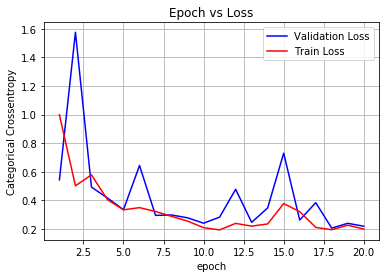

In [50]:
b_v_el_2, b_t_el_2 = plotting(b_plot_2, 'loss')

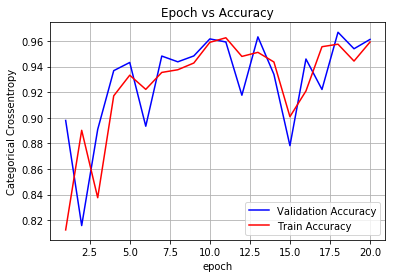

In [51]:
b_v_ea_2, b_t_ea_2 = plotting(b_plot_2, 'acc')

In [52]:
b_va_el_2 = np.round(min(b_v_el_2), 3)
b_ta_el_2 = np.round(min(b_t_el_2),3)

print("Validation loss:", b_va_el_2)
print("Train loss:", b_ta_el_2, '\n')

print('*'*30, '\n')

b_va_ea_2 = np.round(max(b_v_ea_2),3)
b_ta_ea_2 = np.round(max(b_t_ea_2),3)

print("Validation accuracy:", b_va_ea_2)
print("Train accuracy:", b_ta_ea_2)

Validation loss: 0.207
Train loss: 0.194 

****************************** 

Validation accuracy: 0.967
Train accuracy: 0.962


In [54]:
b_plot_3 = mod_batch(3)

For hidden layers 3 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 135us/step - loss: 1.0194 - acc: 0.8171 - val_loss: 0.4800 - val_acc: 0.9129
Epoch 2/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.5061 - acc: 0.8800 - val_loss: 0.5178 - val_acc: 0.8924
Epoch 3/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.5404 - acc: 0.8745 - val_loss: 0.3903 - val_acc: 0.9235
Epoch 4/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.5678 - acc: 0.8535 - val_loss: 0.5888 - val_acc: 0.8377
Epoch 5/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.4355 - acc: 0.8851 - val_loss: 0.3867 - val_acc: 0.9182
Epoch 6/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.3851 - acc: 0.9109 - val_loss: 0.3753 - val_acc: 0.9039
Epoch 7/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.3170 - acc: 0.9264

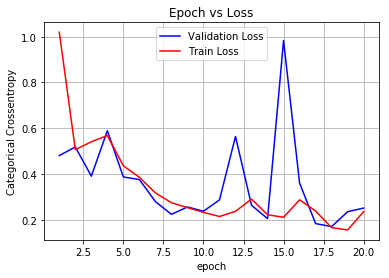

In [55]:
b_v_el_3, b_t_el_3 = plotting(b_plot_3, 'loss')

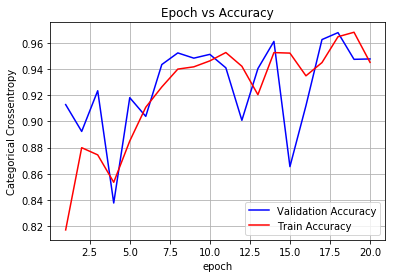

In [56]:
b_v_ea_3, b_t_ea_3 = plotting(b_plot_3, 'acc')

In [57]:
b_va_el_3 = np.round(min(b_v_el_3), 3)
b_ta_el_3 = np.round(min(b_t_el_3),3)

print("Validation loss:", b_va_el_3)
print("Train loss:", b_ta_el_3, '\n')

print('*'*30, '\n')

b_va_ea_3 = np.round(max(b_v_ea_3),3)
b_ta_ea_3 = np.round(max(b_t_ea_3),3)

print("Validation accuracy:", b_va_ea_3)
print("Train accuracy:", b_ta_ea_3)

Validation loss: 0.17
Train loss: 0.155 

****************************** 

Validation accuracy: 0.968
Train accuracy: 0.968


In [58]:
b_plot_5 = mod_batch(5)

For hidden layers 5 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 191us/step - loss: 1.4800 - acc: 0.7048 - val_loss: 1.4548 - val_acc: 0.6643
Epoch 2/20
60000/60000 [==============================] - 9s 149us/step - loss: 1.1101 - acc: 0.7169 - val_loss: 0.9456 - val_acc: 0.7740
Epoch 3/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.9810 - acc: 0.7525 - val_loss: 0.8830 - val_acc: 0.7671
Epoch 4/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.8108 - acc: 0.7942 - val_loss: 0.7032 - val_acc: 0.8403
Epoch 5/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.6740 - acc: 0.8475 - val_loss: 0.5745 - val_acc: 0.8830
Epoch 6/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.5670 - acc: 0.8787 - val_loss: 0.5243 - val_acc: 0.8945
Epoch 7/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.5852 - acc: 0.855

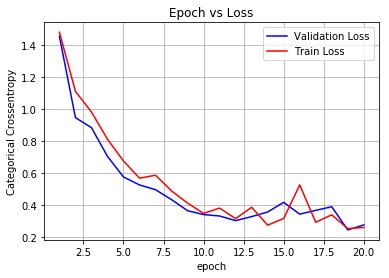

In [59]:
b_v_el_5, b_t_el_5 = plotting(b_plot_5, 'loss')

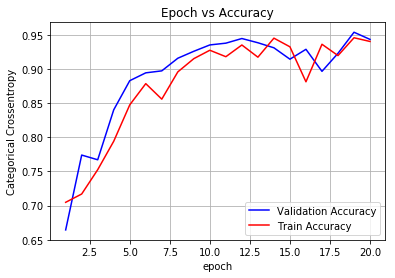

In [60]:
b_v_ea_5, b_t_ea_5 = plotting(b_plot_5, 'acc')

In [61]:
b_va_el_5 = np.round(min(b_v_el_5), 3)
b_ta_el_5 = np.round(min(b_t_el_5),3)

print("Validation loss:", b_va_el_5)
print("Train loss:", b_ta_el_5, '\n')

print('*'*30, '\n')

b_va_ea_5 = np.round(max(b_v_ea_5),3)
b_ta_ea_5 = np.round(max(b_t_ea_5),3)

print("Validation accuracy:", b_va_ea_5)
print("Train accuracy:", b_ta_ea_5)

Validation loss: 0.243
Train loss: 0.251 

****************************** 

Validation accuracy: 0.954
Train accuracy: 0.946


In [62]:
from prettytable import PrettyTable

a = PrettyTable()

a.field_names = ['S.No', 'Layers', 'Activation', 'Optimizer', 'Regularization', 'Test Loss', 'Test Accuracy']

a.add_row([1, 2, 'relu', 'adam', 'None', va_el_2, va_ea_2])
a.add_row([2, 3, 'relu', 'adam', 'None', va_el_3, va_ea_3])
a.add_row([3, 5, 'relu', 'adam', 'None', va_el_5, va_ea_5])

print(a.get_string(title = 'Table for activation - relu and optimizer - adam'))

print('\n')

from prettytable import PrettyTable

b = PrettyTable()

b.field_names = ['S.No', 'Layers', 'Activation', 'Optimizer', 'Regularization', 'Test Loss', 'Test Accuracy']

b.add_row([1, 2, 'relu', 'adam', 'Dropout', d_va_el_2, d_va_ea_2])
b.add_row([2, 3, 'relu', 'adam', 'Dropout', d_va_el_3, d_va_ea_3])
b.add_row([3, 5, 'relu', 'adam', 'Dropout', d_va_el_5, d_va_ea_5])

print(b.get_string(title = 'Table for Activation - Relu and Optimizer - Adam, regularization- Dropout'))

print('\n')

from prettytable import PrettyTable

c = PrettyTable()

c.field_names = ['S.No', 'Layers', 'Activation', 'Optimizer', 'Regularization', 'Test Loss', 'Test Accuracy']

c.add_row([1, 2, 'relu', 'adam', 'Batch Normalization', b_va_el_2, b_va_ea_2])
c.add_row([2, 3, 'relu', 'adam', 'Batch Normalization', b_va_el_3, b_va_ea_3])
c.add_row([3, 5, 'relu', 'adam', 'Batch Normalization', b_va_el_5, b_va_ea_5])

print(c.get_string(title = 'Table for Activation - Relu and Optimizer - Adam, regularization- BatchNormalization'))

+------+--------+------------+-----------+----------------+-----------+---------------+
| S.No | Layers | Activation | Optimizer | Regularization | Test Loss | Test Accuracy |
+------+--------+------------+-----------+----------------+-----------+---------------+
|  1   |   2    |    relu    |    adam   |      None      |   0.418   |     0.934     |
|  2   |   3    |    relu    |    adam   |      None      |   0.185   |     0.969     |
|  3   |   5    |    relu    |    adam   |      None      |   1.798   |     0.875     |
+------+--------+------------+-----------+----------------+-----------+---------------+


+------+--------+------------+-----------+----------------+-----------+---------------+
| S.No | Layers | Activation | Optimizer | Regularization | Test Loss | Test Accuracy |
+------+--------+------------+-----------+----------------+-----------+---------------+
|  1   |   2    |    relu    |    adam   |    Dropout     |   0.226   |     0.962     |
|  2   |   3    |    relu    |